## Question 1 Pre processing


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load the data
df = pd.read_csv("../data/cleaned_fundme_data.csv")

# Convert datetime columns
df["created_at"] = pd.to_datetime(df["created_at"])
df["updated_at"] = pd.to_datetime(df["updated_at"])
df["last_donation_at"] = pd.to_datetime(df["last_donation_at"], errors='coerce')

# Handle missing values (fill missing categories with 'Unknown')
df["cat_name"] = df["cat_name"].fillna("Unknown")
df["country"] = df["country"].fillna("Unknown")
df["state"] = df["state"].fillna("Unknown")

# Define the success variable based on goal progress
df["success"] = df["goal_progress"] >= 1.0  # 1.0 means goal met or exceeded

# Encode categorical features
le = LabelEncoder()
df["cat_name_encoded"] = le.fit_transform(df["cat_name"])

# Handle numerical features
num_cols = ["goalamount", "realbalance", "donation_count", "comment_count_full"]
df[num_cols] = df[num_cols].fillna(0)

# Add log transformations for skewed variables (optional)
df["log_goalamount"] = np.log1p(df["goalamount"])
df["log_donation_count"] = np.log1p(df["donation_count"])

# Save cleaned data
df.to_csv("gofundme_cleaned.csv", index=False)


## EDA


C:\Users\Data Mining\AppData\Local\Temp\ipykernel_10608\2179883804.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_success_rate.index, y=category_success_rate.values, palette="viridis")


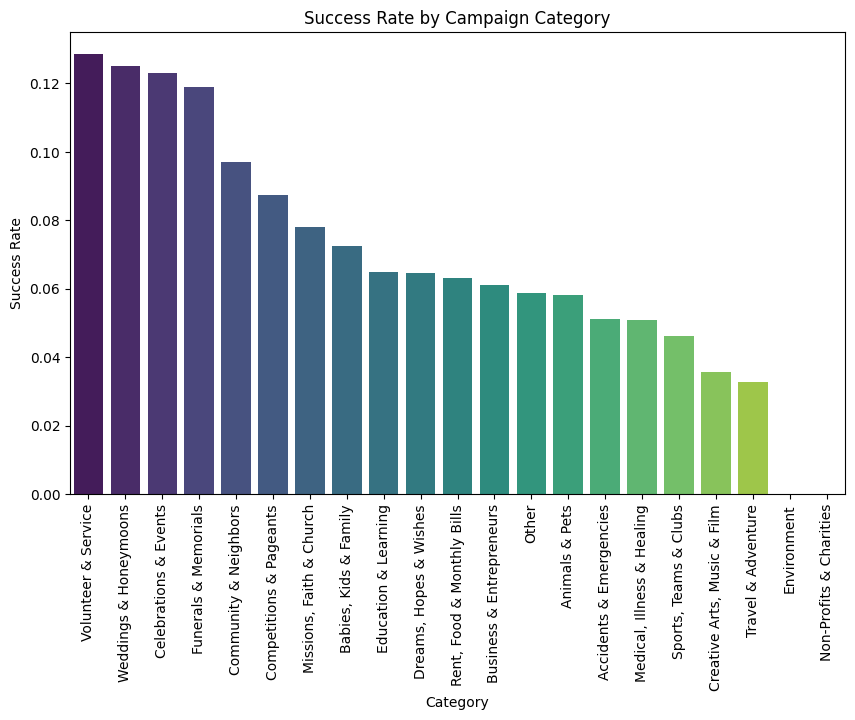

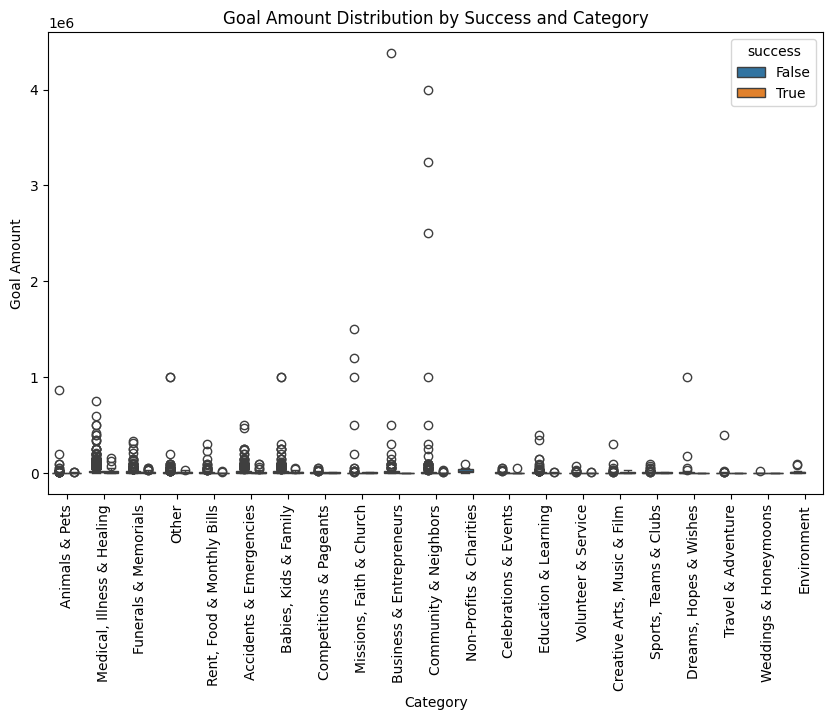

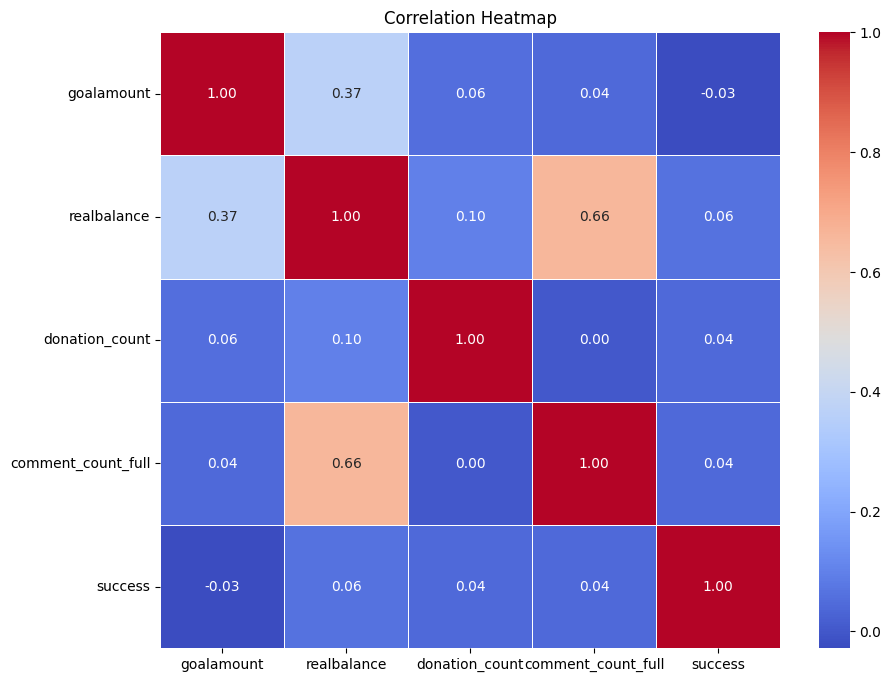

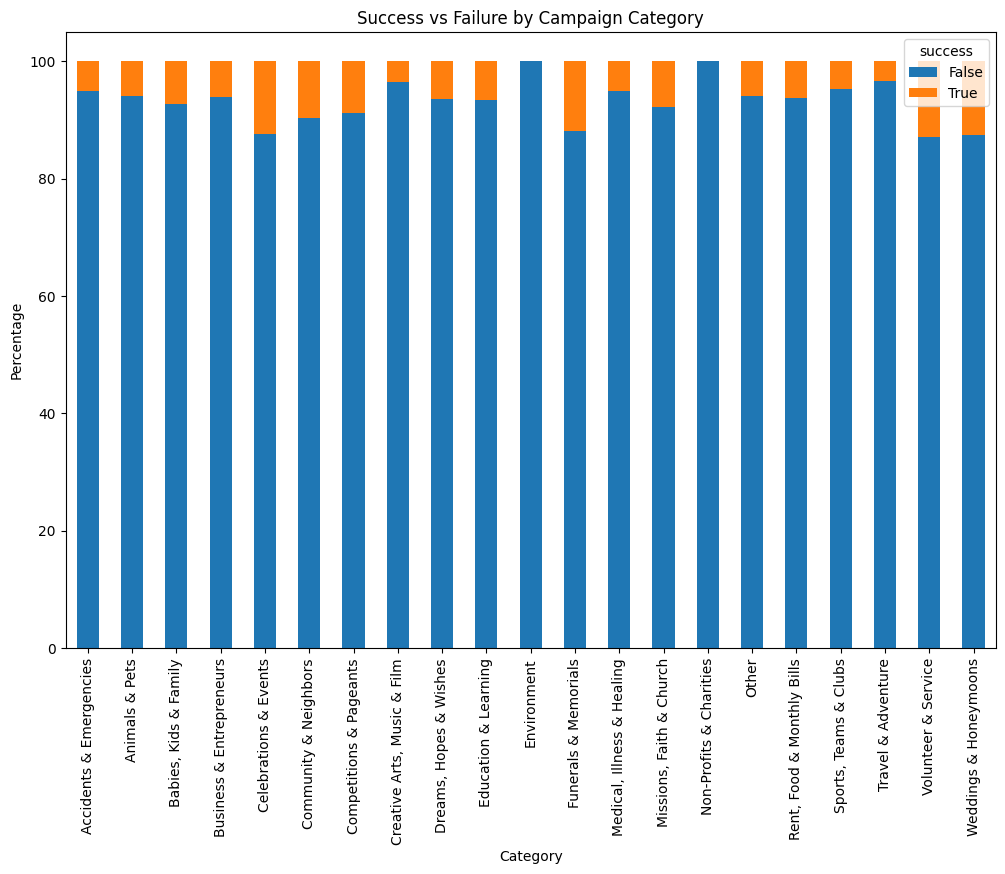

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate success rate by category
category_success_rate = df.groupby("cat_name")["success"].mean().sort_values(ascending=False)

# 2. Bar plot of success rate by category
plt.figure(figsize=(10, 6))
sns.barplot(x=category_success_rate.index, y=category_success_rate.values, palette="viridis")
plt.title("Success Rate by Campaign Category")
plt.xlabel("Category")
plt.ylabel("Success Rate")
plt.xticks(rotation=90)
plt.show()

# 3. Boxplot to see the distribution of goal amount vs. success
plt.figure(figsize=(10, 6))
sns.boxplot(x="cat_name", y="goalamount", hue="success", data=df)
plt.title("Goal Amount Distribution by Success and Category")
plt.xlabel("Category")
plt.ylabel("Goal Amount")
plt.xticks(rotation=90)
plt.show()

# 4. Correlation heatmap to explore other numeric relationships
plt.figure(figsize=(10, 8))
corr = df[["goalamount", "realbalance", "donation_count", "comment_count_full", "success"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# 5. Success distribution by campaign category
success_by_category = df.groupby("cat_name")["success"].value_counts().unstack().fillna(0)
success_by_category_percentage = success_by_category.div(success_by_category.sum(axis=1), axis=0) * 100

# Plot success vs failure percentages by category
success_by_category_percentage.plot(kind="bar", stacked=True, figsize=(12, 8))
plt.title("Success vs Failure by Campaign Category")
plt.xlabel("Category")
plt.ylabel("Percentage")
plt.xticks(rotation=90)
plt.show()
